В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import load_wine

data = load_wine()
x = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
x.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


Есть ли в наборе данных пропущенные значения? Если да, то удалим их. Есть ли в наборе данных категориальные переменные? Если да, то закодируем их при помощи OneHot-кодирования. Использую [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [13]:
x.isnull().sum().sum()

0

In [14]:
x.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Пропущенных значений нет, категориальных переменных нет, все типа float

Используя функцию `train_test_split()`, разделим выборку на тренировочную и тестовую, и долю тестовой выборки зададим равной 0.3. Так как разбиение осуществляется случайным образом, не забудем зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используем аргумент `stratify` при разбиении.

In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(52)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=52, stratify=y)

На тренировочной выборке обучим шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставим равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25. Для обучения пока что будем использовать только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудем масштабировать признаки, например, при помощи модуля `StandardScaler`.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable

In [17]:
n_neighbors_values = (1, 3, 5, 10, 15, 25)
knn_spisok = []
results = {}
np.random.seed(52)
scaler = StandardScaler()

train_x_set = train_x[['alcohol', 'magnesium']]
test_x_set = test_x[['alcohol', 'magnesium']]

train_x_scaled = scaler.fit_transform(train_x_set)
test_x_scaled = scaler.transform(test_x_set)


for n in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x_scaled, train_y)
    knn_spisok.append(knn)
    train_y_pred = knn.predict(train_x_scaled)
    test_y_pred = knn.predict(test_x_scaled)
    accuracy_train = accuracy_score(train_y, train_y_pred)
    accuracy_test = accuracy_score(test_y, test_y_pred)
    results[n] = [round(accuracy_train, 2), round(accuracy_test,2)]
print('NN  TEST  TRAIN')
results

NN  TEST  TRAIN


{1: [1.0, 0.59],
 3: [0.85, 0.65],
 5: [0.84, 0.63],
 10: [0.75, 0.69],
 15: [0.73, 0.7],
 25: [0.69, 0.72]}

In [18]:
!pip install mlxtend


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import mlxtend

Построим сетку графиков решающих поверхностей для обученных выше классификаторов с помощью библиотеки `mlxtend`.

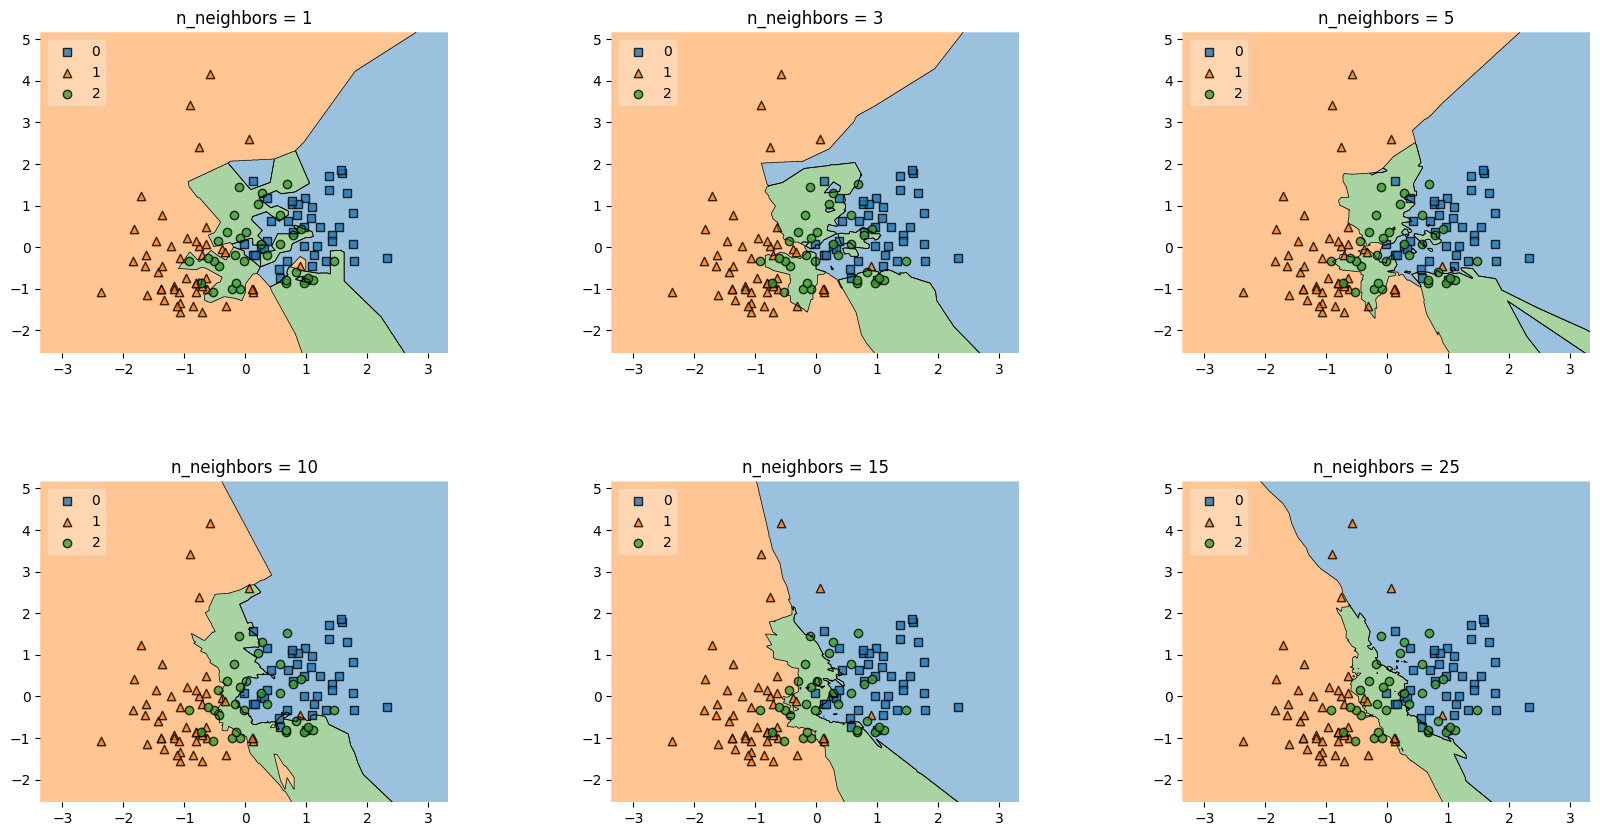

In [20]:
from mlxtend.plotting import plot_decision_regions
from itertools import product


fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(2, 3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for clf, grd, nn in zip(knn_spisok, product([0, 1, 2], repeat=2), n_neighbors_values):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(train_x_scaled, y=train_y, clf=clf, legend=2)
    plt.title(f'n_neighbors = {nn}')


plt.show()

Переобучение с малым числом соседей: Модель с одним соседом показывает идеальные результаты на тестовом наборе данных, но значительно худшие на обучающем. Это указывает на переобучение, поскольку модель захватывает шум в данных обучения. Граница решения для одного соседа очень сложная и плотно подходит к отдельным точкам, что указывает на то, что она может не обобщаться хорошо.

Недообучение с большим числом соседей: На другом конце спектра, с увеличением числа соседей, граница решения становится более гладкой и менее чувствительной к точкам данных. Однако точность как на тесте, так и на обучении уменьшается, что может указывать на недообучение — когда модель слишком проста, чтобы уловить внутреннюю структуру данных.

Оптимальное число соседей: Ища баланс между двумя крайностями, оптимальным может быть использование 3 или 5 соседей. Они предотвращают слишком большую сложность модели, но при этом адаптируются к структуре данных. Границы решения для этих моделей, кажется, обобщают лучше, чем модель с 1 соседом, но более гибки, чем те, у которых много соседей. Точность также более сбалансирована и выше, чем у моделей с большим числом соседей.

Подводя итог, модели с слишком малым числом соседей склонны к переобучению, как видно по сложным границам решений и различиям в точности на тестовой и обучающей выборках. Модели с слишком большим числом соседей склонны к недообучению, как видно по чрезмерно упрощенным границам и одинаково низкой точности. Оптимальное количество соседей находится в среднем диапазоне, которое достигает компромисса между сложностью модели и способностью к обобщению. Здесь геометрия данных и получаемая решающая поверхность подсказывают, что модель как раз подходит для данной задачи.

Сейчас мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

In [21]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        return Counter([self.y_train[i] for i in np.argsort([np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train])[:self.k]]).most_common(1)[0][0]

In [22]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [23]:
test_knn(KNN)

Рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [24]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

Работаем с пропущенными значениями и лишними признаками

In [25]:
print(data.isnull().sum().sum())
data = data.drop(['Unnamed: 0'], axis=1)
data

0


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Пропущенных значений нет. Unnamed: 0 бесполезный столбец, мы его удалим

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведим матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

In [26]:
correlation_matrix = data

correlation_matrix = correlation_matrix.drop('cut', axis=1)
correlation_matrix = correlation_matrix.drop('color', axis=1)
correlation_matrix = correlation_matrix.drop('clarity', axis=1)
correlation_matrix = correlation_matrix.corr()
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop('price')
print(correlation_with_target)


carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируем категориальные переменные при помощи OneHot-кодирования.

In [27]:
data = pd.get_dummies(data=data)
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


Разделим выборку на тренировочную и тестовую

In [28]:
y = data['price']
x = data.drop('price', axis=1)

np.random.seed(52)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=52)


Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируем вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Оценим линейную регрессию на тренировочной выборке. Посмотрим на среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin = LinearRegression()
lin.fit(x_train_scaled, y_train)
y_train_pred = lin.predict(x_train_scaled)
y_test_pred = lin.predict(x_test_scaled)

print(mean_squared_error(y_train, y_train_pred))

1283866.3786370333


Посмотрим на полученные оценки коэффициентов. Возможно есть вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [31]:
koef = lin.coef_
for i in range(len(koef)):
    print(f'{x.columns[i]} {koef[i]}')

carat 5279.473982137445
depth -95.83717128843602
table -64.35955793730041
x -1074.0966329782998
y 0.3703396500450265
z -30.029652672845746
cut_Fair 336104822461798.6
cut_Good 563745756632275.6
cut_Ideal 963810324225067.5
cut_Premium 860581302153391.9
cut_Very Good 820149828572942.8
color_D -331787292118928.2
color_E -384150167731039.2
color_F -380063465578182.75
color_G -406609905875494.44
color_H -360213629829307.06
color_I -300543139617142.25
color_J -221488513248634.88
clarity_I1 -167466622536316.0
clarity_IF -251679639748210.3
clarity_SI1 -608382910692145.2
clarity_SI2 -537352375425613.06
clarity_VS1 -508980241095077.06
clarity_VS2 -596678192422103.2
clarity_VVS1 -354222148102618.4
clarity_VVS2 -416280705195052.5


carat весит относительно больше других весов

Как можно заметить из анализа корреляционной матрицы, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные на предыдущем шаге также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучим Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используем модули `Lasso` и `Ridge` из `sklearn`.

In [32]:
print(len(x_train_scaled))
print(len(x_train))

37758
37758


In [33]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lin_l = Lasso(alpha=10)
lin_l.fit(x_train_scaled, y_train)
koef = lin_l.coef_
for i in range(len(koef)):
    print(f'{x.columns[i]} {koef[i]}')

carat 4816.007210371159
depth -62.96416659451833
table -52.121689401260475
x -619.478794856555
y -0.0
z -41.50109776889536
cut_Fair -130.5083518187156
cut_Good -38.46380719854706
cut_Ideal 41.48945702389318
cut_Premium 0.0
cut_Very Good -0.0
color_D 142.23690984018998
color_E 90.57063560133253
color_F 61.712949222406635
color_G -0.0
color_H -165.56442373784128
color_I -277.13404289197564
color_J -398.64693769339533
clarity_I1 -493.3883899350265
clarity_IF 178.25761411716414
clarity_SI1 -260.65116605738797
clarity_SI2 -583.9781153496872
clarity_VS1 101.60821064817658
clarity_VS2 -0.0
clarity_VVS1 175.27792627573646
clarity_VVS2 199.08993773682224


In [34]:
lin_r = Ridge(alpha=10)
lin_r.fit(x_train_scaled, y_train)
koef = lin_r.coef_
for i in range(len(koef)):
    print(f'{x.columns[i]} {koef[i]}')

carat 5242.783878694136
depth -93.70957991388131
table -65.51543799291973
x -1033.5356744496626
y -1.583045469680844
z -32.927959821733886
cut_Fair -129.60959684334262
cut_Good -37.29699491151326
cut_Ideal 51.33928315872806
cut_Premium 17.068615219737108
cut_Very Good 0.5098713411318492
color_D 205.99235283780817
color_E 160.51955469260403
color_F 131.91768385056042
color_G 57.11728029597203
color_H -122.83576514625761
color_I -248.0528478766695
color_J -381.839685939729
clarity_I1 -475.44392040152974
clarity_IF 231.57427063721622
clarity_SI1 -147.81578249246698
clarity_SI2 -493.6031059810859
clarity_VS1 208.4253053529411
clarity_VS2 109.92949472197802
clarity_VVS1 246.0154083064475
clarity_VVS2 282.70552494772465


Lasoo сильно уменьшила весса в таких категориях как cut_Ideal, color_D, color_E, color_F, color_H, clarity_IF, clarity_SI1, clarity_VS1, clarity_VS2, clarity_VVS1
параметры y, z, cut_Premium, cut_Very_Good, color_G были занулены
Ridge просто уменьшил веса

Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и построим график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

c:\Users\BRIGPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.524e+07, tolerance: 5.990e+07
  model = cd_fast.enet_coordinate_descent(


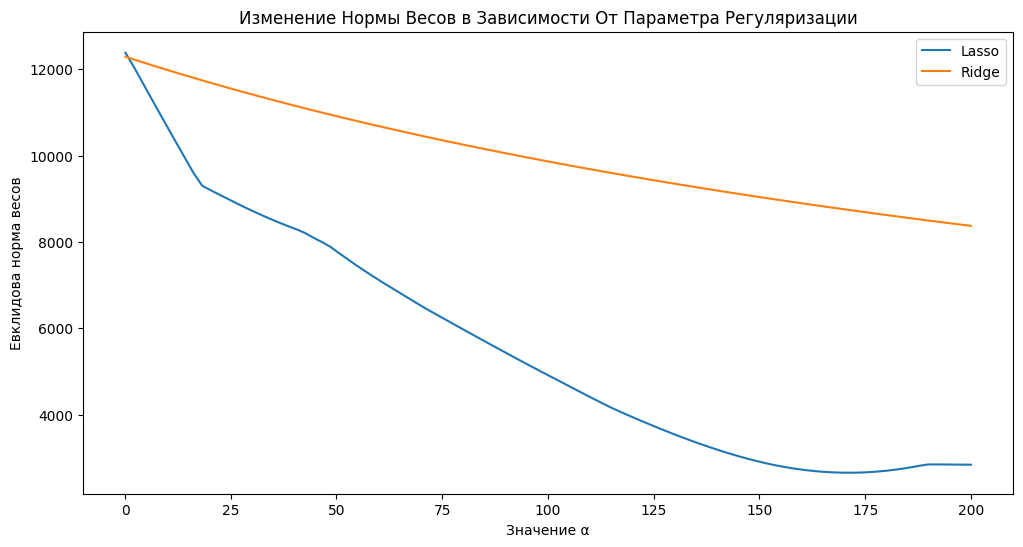

In [35]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

alphas = np.linspace(0.1, 200, 100)

norms_lasso = []
norms_ridge = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    norms_lasso.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    norms_ridge.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(12, 6))
plt.plot(alphas, norms_lasso, label='Lasso')
plt.plot(alphas, norms_ridge, label='Ridge')
plt.xlabel('Значение α')
plt.ylabel('Евклидова норма весов')
plt.title('Изменение Нормы Весов в Зависимости От Параметра Регуляризации')
plt.legend()
plt.show()


На графике видно, что веса в Lasso-регрессии уменьшаются гораздо более агрессивно, чем в Ridge-регрессии

Lasso-регрессия может обнулять веса некоторых признаков полностью, благодаря чему она работает как метод отбора признаков.

В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установим количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредним ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберем то значение, которое даёт наибольшее качество.

In [36]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 200]

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(x_train_scaled, y_train)


mse_means = lasso_cv.mse_path_.mean(axis=1)

min_mse = np.argmin(mse_means)
opt_alpha = lasso_cv.alphas_[min_mse]

opt_alpha, mse_means[min_mse]


(1.0, 1288418.067373756)

Обучим итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке.

In [37]:
lasso = Lasso(alpha=1)
lasso.fit(x_train_scaled, y_train)
coefficients = lasso.coef_
for i in coefficients:
    print(i)

5233.707893128924
-92.9574219482763
-64.44247270020036
-1029.8695105120862
-0.0
-30.011618943268235
-135.5372559189488
-47.37190561035818
33.19799185683248
0.0
-14.22404171826965
158.11380541542977
105.32414060277647
77.36906122501155
-0.0
-172.82773114030977
-289.4956494429108
-412.15388537970637
-505.5347281706159
184.1696819115638
-259.65420403073927
-592.0063230939577
113.41865583033139
-0.0
179.72159194284762
205.00919292089492


Наконец сделаем предсказания обученной Lasso-регрессии на тестовой выборке и сравним среднеквадратичную ошибку с ошибкой обычной линейной регрессии. Решим какую модель лучше использовать для предсказаний

In [38]:
y_train_pred = lasso.predict(x_test_scaled)
print(f'{mean_squared_error(y_test, y_test_pred)} - Lasoo')
print(f'{1283866.3786370333} - Linear')

1261598.1120943616 - Lasoo
1283866.3786370333 - Linear


Лучше использовать Lasso, так как у нее меньше квадративная ошибка, это обусловлено регуляризацией, выбором оптимального коэффициента, искллючением признаков и всей проделланой работы.